<a href="https://colab.research.google.com/github/Preetirai-tech/Online-Retail-Customer-Segmentation-Project/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Online Retail Customer Segmentation**



## **Project Type**    - **Unsupervised**
## **Contribution**    - **Preeti Rai (Individual)**

![Alt Text](https://camo.githubusercontent.com/8543f7839329a64b88533176de6dfb44f69e90f628abe4c9ce50f156ccbc0593/68747470733a2f2f736f75726369666963636f6e73756c74696e672e636f2e756b2f77702d636f6e74656e742f75706c6f6164732f696d61676531392e676966)


# **Project Summary -**

- This project focuses on Online Retail Customer Segmentation, a vital aspect of modern business. By categorizing customers into distinct groups based on their characteristics, businesses can gain valuable insights and tailor their strategies to meet the unique needs of each segment.

- The objective of this project was to analyze a transnational dataset from a UK-based online retail company specializing in all-occasion gifts. The dataset covered a period of time from 01/12/2010 to 09/12/2011 and included transactions made by individual customers as well as wholesalers.

- To achieve this, I utilized the Recency-Frequency-Monetary (RFM) model, which assigns quantitative values to customers based on three key dimensions: recency of their last purchase, frequency of their transactions, and monetary value of their purchases. By leveraging advanced clustering algorithms such as K-Means, Agglomerative Hierarchical Clustering, and DBSCAN, I successfully segmented the customers into distinct groups.

- The project involved various steps, including data inspection, exploratory data analysis (EDA), data preparation, RFM model creation, and implementation of clustering models. Through these steps, I gained meaningful insights into customer behavior, identified key customer segments, and drew valuable conclusions that can guide targeted marketing strategies and enhance customer satisfaction.

- Overall, this project showcased my expertise in data analysis, customer segmentation, and implementation of clustering algorithms. The insights obtained from this project can empower businesses to optimize their offerings, improve customer experiences, and drive growth in the competitive online retail industry.

# **GitHub Link -**

https://github.com/Preetirai-tech/Online-Retail-Customer-Segmentation-Project

# **Index**

## **In this project, We will do**

1. Problem Statement
2. Know Your Data
3. Understanding Your Variables
4. EDA
5. Data Cleaning
6. Feature Engineering
7. Model Building
8. Model Implementation
9. Conclusion

# ***Let's Begin !***

# **1. Problem Statement**


**The objective of this project is to develop a customer segmentation model for an online retail business in order to gain valuable insights into the customer base and implement targeted strategies to enhance customer satisfaction, increase sales, and optimize marketing efforts. By analyzing transactional data and customer attributes such as purchasing behavior, demographics, and geographic location, the project aims to create meaningful customer segments that can drive personalized marketing campaigns, improve inventory management, and foster customer loyalty.**

# **2. Know Your Data**

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)

plt.style.use('ggplot')

import missingno as msno


from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
retail_df = pd.read_excel("/content/drive/MyDrive/AlmaBetter/Capstone Project/Unsupervised/Online Retail.xlsx")

### Dataset First View

In [4]:
# Display the first 5 rows of the dataset
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Display the last 5 rows of the dataset
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
# Sample of the dataset
retail_df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
193853,553545,22385,JUMBO BAG SPACEBOY DESIGN,1,2011-05-17 15:37:00,4.13,NaN,United Kingdom
310379,564181,23287,RED VINTAGE SPOT BEAKER,8,2011-08-23 14:53:00,0.85,13862.0,United Kingdom
511802,579508,23205,CHARLOTTE BAG VINTAGE ALPHABET,1,2011-11-29 16:33:00,1.63,NaN,United Kingdom
35408,539436,22355,CHARLOTTE BAG SUKI DESIGN,1,2010-12-17 14:49:00,1.66,NaN,United Kingdom
404445,571676,23148,MINIATURE ANTIQUE ROSE HOOK IVORY,2,2011-10-18 13:29:00,0.83,16910.0,United Kingdom


### Dataset Rows & Columns count

In [7]:
# Dimension of the datasets
rows, columns = retail_df.shape
print(f'The dataset has', rows, 'rows and', columns, 'columns')

The dataset has 541909 rows and 8 columns


## Columns

In [8]:
# The total number of columns in the dataset

print('The total number of columns in the dataset: ', retail_df.shape[1], '\nThese are:')

count = 1
for col in retail_df.columns.to_list():
  print(count,'.', col)
  count += 1


The total number of columns in the dataset:  8 
These are:
1 . InvoiceNo
2 . StockCode
3 . Description
4 . Quantity
5 . InvoiceDate
6 . UnitPrice
7 . CustomerID
8 . Country


### Dataset Information

In [9]:
# Dataset Info
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**The dataset contains 541909 rows and 8 columns.**


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
dup = retail_df.duplicated().sum()
print(f'The total number of duplicated values in the dataset: {dup}')

The total number of duplicated values in the dataset: 5268


#### Missing Values/Null Values

In [11]:
missing = retail_df.columns[retail_df.isnull().any()].tolist()
missing
round(retail_df[missing].isnull().mean() * 100, 2).sort_values(ascending = False)

CustomerID     24.93
Description     0.27
dtype: float64

In [12]:
# Missing Values/Null Values Count
missing = retail_df.columns[retail_df.isnull().any()].tolist()
missing

print('Missing Data count')
print(retail_df[missing].isnull().sum().sort_values(ascending=False))
print()

print('++'*12)
print()
print('Missing Data Percentage')
print(round(retail_df[missing].isnull().mean() * 100, 2).sort_values(ascending = False))

Missing Data count
CustomerID     135080
Description      1454
dtype: int64

++++++++++++++++++++++++

Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


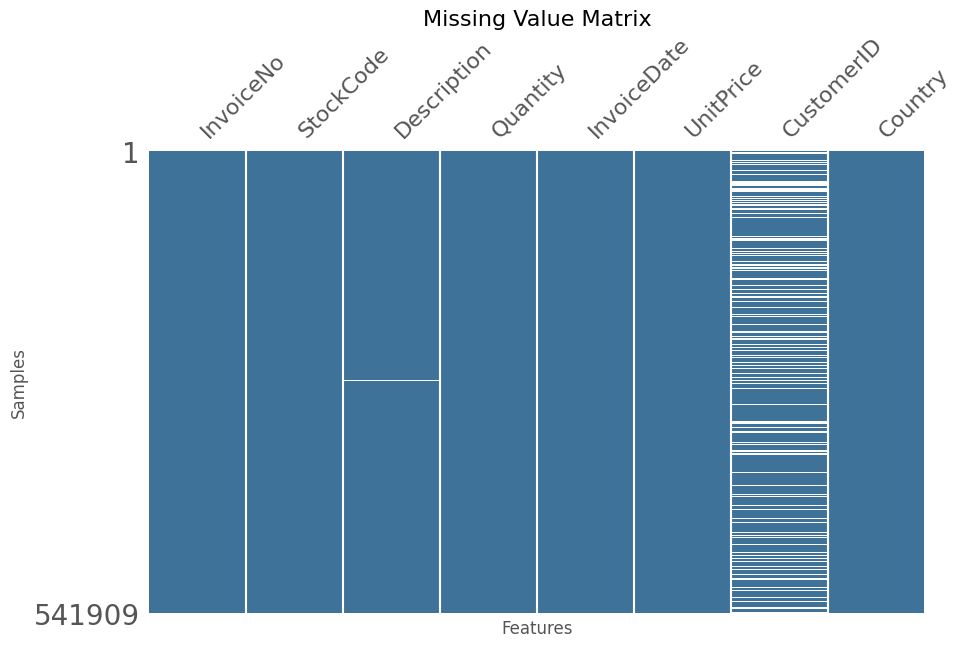

In [13]:
import missingno as msno

# create missing value matrix plot
msno.matrix(retail_df, figsize=(10,6), sparkline=False, color=(0.25, 0.45, 0.6))

# customize plot
plt.title('Missing Value Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.show()


**Observation:**
- 24.93% of items purchased are not assigned to any customer. Hence there is no use of having the data with no customer assignment. Because we can't form clusters without CustomerID so we will delete them from dataset.

### What did you know about your dataset?

- **The dataset is of transnational dataset which contains all the transactions occuring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.**
- **The company mainly sells unique all-occassion gifts.**
- **Many customers of the company are wholesalers.**
- **The dataset contains 541909 rows and 8 columns.**
- **There are 2 columns of datatype float64, 1 column of datatype int64, 4 columns of datatype object and 1 column of datatype datetime64.**
- **The total number of duplicated values in the dataset: 5268**
- **Missing Data Percentage**
     - **CustomerID -    24.93%**
     - **Description -     0.27%**

## **3. Understanding Your Variables**

In [14]:
# Dataset Columns
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [15]:
# Statistical summary of the dataset
retail_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


### Variables Description

- **InvoiceNo:** This variable represents the invoice or transaction number assigned to each purchase. It serves as a unique identifier for each transaction. Data type: Nominal, 6-digit integral number (including 'c' prefix for cancellations).

- **StockCode:** The StockCode variable corresponds to a code or identifier assigned to each distinct product in the inventory. It helps identify specific products purchased by customers. Data type: Nominal, 5-digit integral number.

- **Description:** The Description variable provides a brief description or name of the product purchased in each transaction. It gives a textual representation of the product. Data type: Nominal.

- **Quantity:** This variable denotes the quantity of each product purchased in a transaction. It represents the number of units of a particular product bought by the customer. Data type: Integer.

- **InvoiceDate:** The InvoiceDate variable indicates the date and time when each transaction took place. It helps track the timing and frequency of customer purchases. Data type: DateTime.

- **UnitPrice:** This variable represents the price of each unit of the product in the local currency (e.g., sterling, dollars, euros). It provides information about the cost of the product per unit. Data type: Float.

- **CustomerID:** The CustomerID variable serves as a unique identifier assigned to each customer. It helps track individual customer behavior and preferences. Data type: Float.

- **Country:** The Country variable represents the country where each customer resides or where the transaction took place. It provides information about the geographic location of customers. Data type: Nominal, country name.

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.

for i in retail_df.columns.tolist():
  print("Number of unique values in",i,"is",retail_df[i].nunique())

Number of unique values in InvoiceNo is 25900
Number of unique values in StockCode is 4070
Number of unique values in Description is 4223
Number of unique values in Quantity is 722
Number of unique values in InvoiceDate is 23260
Number of unique values in UnitPrice is 1630
Number of unique values in CustomerID is 4372
Number of unique values in Country is 38


## 4. **Exploratory Data Analysis**

**What is EDA?**

- EDA stands for Exploratory Data Analysis. It is a crucial step in the data analysis process that involves exploring and understanding the characteristics, patterns, and relationships within a dataset. EDA aims to uncover insights, identify patterns, detect outliers, and gain a deeper understanding of the data before conducting further analysis or modeling.

## **Top Selling products**

In [17]:
# Creat a dataframe without cancelled ordered
temp_df = retail_df[~retail_df['InvoiceNo'].astype(str).str.contains('C')]

In [18]:
# Group the dataset by Description column and calculate the sum of the quantity sold for each product
# Select the top 10 products
product = temp_df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)

# Create the dataframe containing the top 10 selling products
top_product = pd.DataFrame({'Product': product.index, 'Quantity Sold': product.values})
top_product


,Product,Quantity Sold
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
3,JUMBO BAG RED RETROSPOT,48478
4,WHITE HANGING HEART T-LIGHT HOLDER,37895
5,POPCORN HOLDER,36761
6,ASSORTED COLOUR BIRD ORNAMENT,36461
7,PACK OF 72 RETROSPOT CAKE CASES,36419
8,RABBIT NIGHT LIGHT,30788
9,MINI PAINT SET VINTAGE,26633


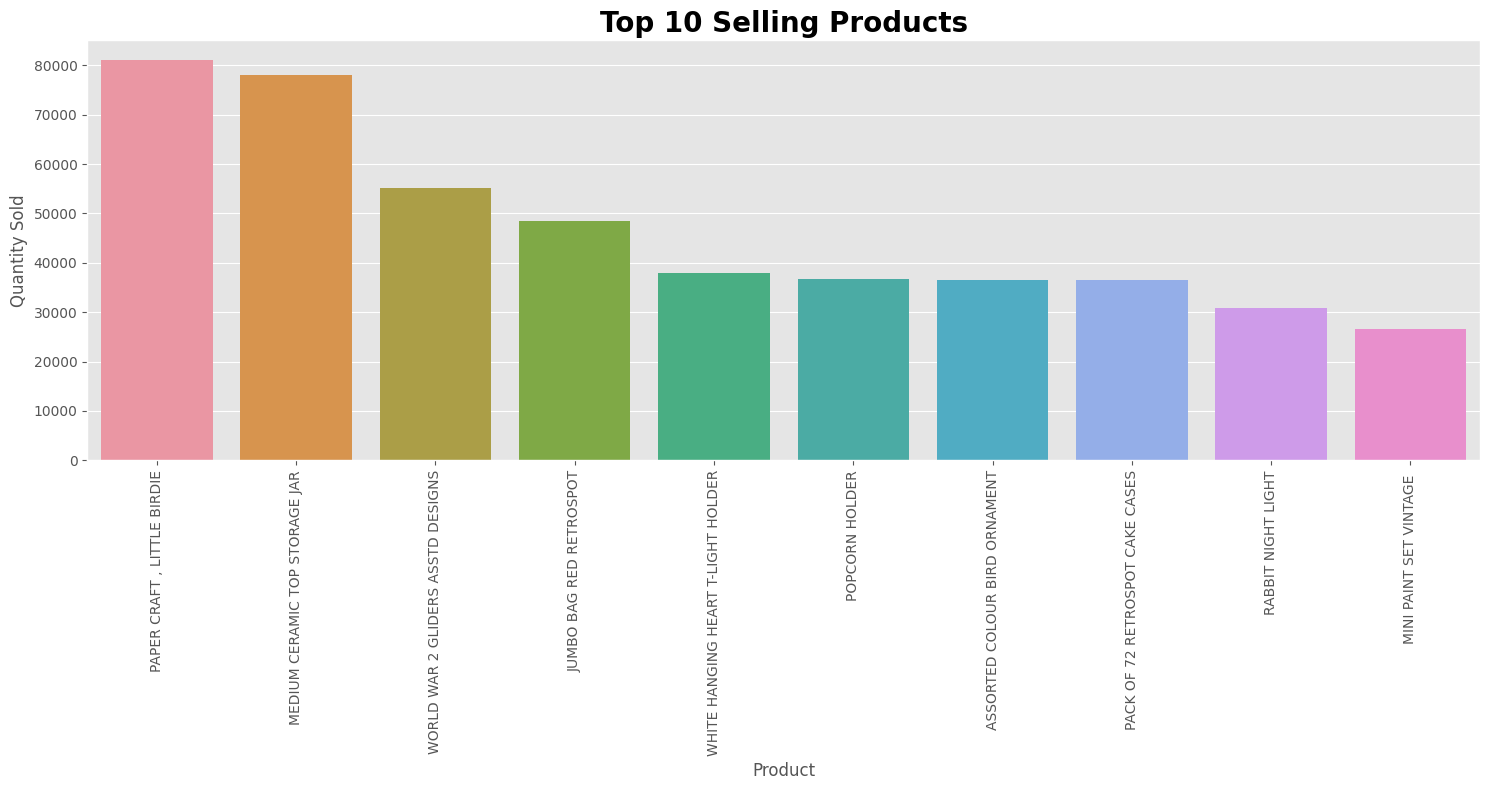

In [19]:
import random
# Generate a list of random colors
#color = [tuple(random.random() for i in range(3)) for j in range(len(top_product))]

# Plot bar chart
plt.figure(figsize = (15, 8))
sns.barplot(top_product, x = 'Product', y = 'Quantity Sold')

# Set the title
plt.title('Top 10 Selling Products', size=20, fontweight='bold')
#plt.xlabel('Product', size = 15)
#plt.ylabel('Quantity Sold', size = 15)

# Rotate the x-axis labels
plt.xticks(rotation = 90)

# Display the chart
plt.tight_layout()


- A bar chart is a good choice for showing the quantity of each product sold as it allows for easy comparison between the different products. It is also effective in highlighting the top 10 selling products.

- This chart shows the quantity of each of the top 10 selling products, providing insight into the most popular items. It also allows for comparison between the different products and their respective quantities sold.

- Yes, the insights gained from this chart can help businesses to make informed decisions about their inventory management, marketing strategies, and overall business operations. By identifying the most popular products, businesses can focus their efforts on these items and potentially increase sales and profits.

##**Least Selling Products**

In [20]:
# Remove all missing and duplicate values in the CustomerID column
temp_df = temp_df.dropna(subset = ['CustomerID'], how = 'all').drop_duplicates()

In [21]:
# Group the dataset by Description column and calculate the sum of the quantity sold for each product
# Select the top 10 least products
least_product = temp_df.groupby('Description')['Quantity'].sum().sort_values().head(10)

# Create the dataframe containing the top 10 selling products
least_selling_products = pd.DataFrame({'Product': least_product.index, 'Quantity Sold': least_product.values})
least_selling_products


,Product,Quantity Sold
0,BLOSSOM IMAGES SCRAP BOOK SET,1
1,PACK 4 FLOWER/BUTTERFLY PATCHES,1
2,BLACK DROP EARRINGS W LONG BEADS,1
3,VINTAGE BEAD PINK JEWEL STAND,1
4,SET/3 FLORAL GARDEN TOOLS IN BAG,1
5,WHITE ROSEBUD PEARL EARRINGS,1
6,WHITE STONE/CRYSTAL EARRINGS,1
7,SET/3 TALL GLASS CANDLE HOLDER PINK,1
8,CROCHET DOG KEYRING,1
9,CAKE STAND LACE WHITE,1


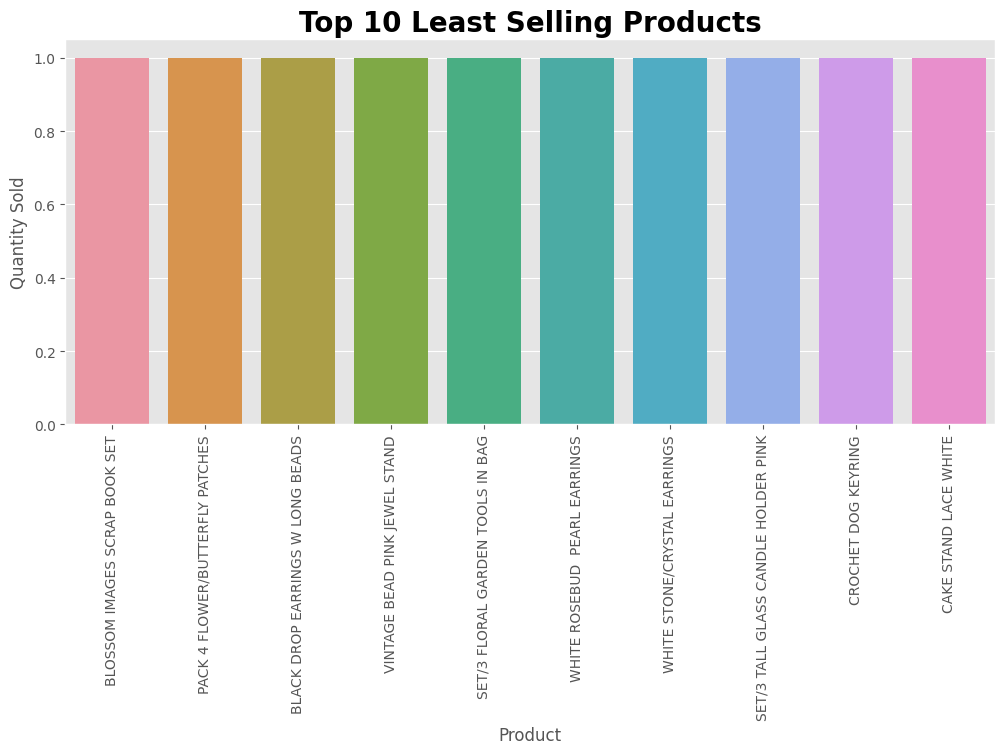

In [22]:
# Plot the top 10 least selling products as a bar chart
plt.figure(figsize = (12, 5))
sns.barplot(least_selling_products, x = 'Product', y = 'Quantity Sold')

# Set title
plt.title('Top 10 Least Selling Products', size = 20, fontweight = 'bold')
#plt.xlabel('Product', size = 15)
#plt.ylabel('Quatity Sold', size = 15)

plt.xticks(rotation = 90);

- A bar chart is a suitable choice for representing the top 10 least selling products as it provides a clear and concise visual comparison between the products in terms of their sales volume. It also allows for easy identification of the products with the lowest sales figures.

- The chart provides insights into which products have had the lowest sales volume, which can be useful information for businesses to determine which products may need to be discounted or promoted in order to increase sales.

- The insights gained from this chart could help create a positive business impact by allowing businesses to identify products that are not selling well and take action to improve their sales volume. For example, businesses may choose to offer discounts or promotions on the least selling products, or discontinue products that consistently have low sales volume to focus on more profitable products.

In [23]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## **Top Customers**

In [24]:
# Create dataframe containing only top 5 customers
top_customers = temp_df['CustomerID'].value_counts().sort_values(ascending = False).reset_index().rename(columns = {'index' : 'CustomerID', 'CustomerID': 'Count'}).head(5)

top_customers



,CustomerID,Count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677


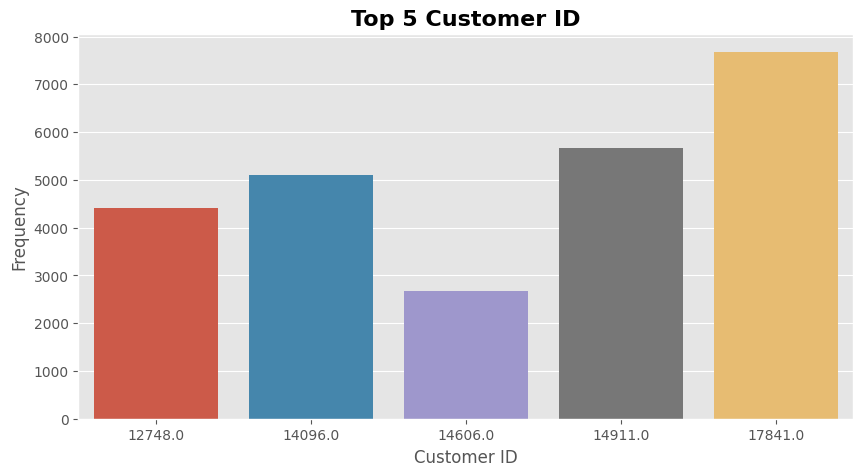

In [25]:
plt.figure(figsize = (10, 5))

# Create the bar plot
sns.barplot(data = top_customers, x = 'CustomerID', y = 'Count')

# Add labels and a title
plt.title('Top 5 Customer ID', fontsize = 16, fontweight = 'bold')
plt.xlabel('Customer ID')
plt.ylabel('Frequency');


- A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the top 5 customer IDs.

- The chart provides insight into the customers who make the most purchases from the business and helps identify potential loyal customers or areas for improvement in customer retention.

- Yes, the insights gained from the chart can help create a positive business impact by informing strategies to retain and attract more customers, as well as identifying areas for improvement in customer service and product offerings.

## **Top Countries**

In [26]:
# Create a dataframe containing countries count
countries = temp_df['Country'].value_counts().reset_index().rename(columns = {'index': 'Country', 'Country': 'Count'})

# Display top 5 countries
countries.head()

,Country,Count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480


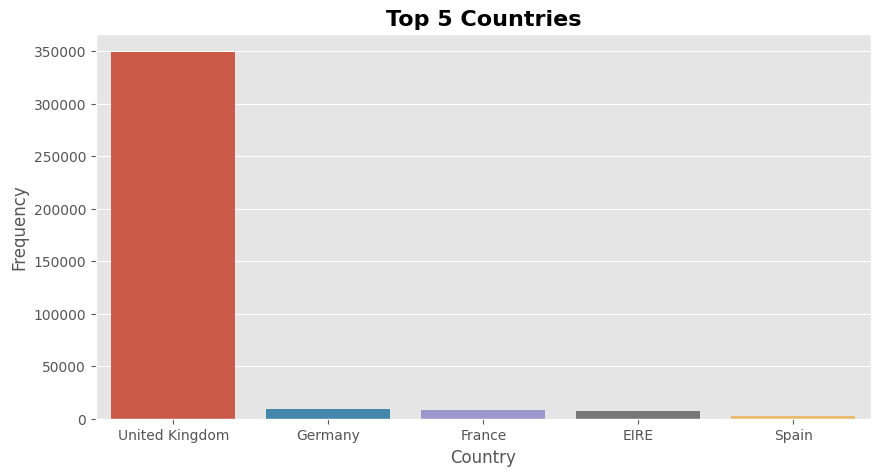

In [27]:
plt.figure(figsize = (10, 5))

# Create the bar plot
sns.barplot(data = countries[:5], x = 'Country', y = 'Count')

# Add labels and a title
plt.title('Top 5 Countries', fontsize = 16, fontweight = 'bold')
#plt.xlabel('Country')
plt.ylabel('Frequency');

- A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the top 5 countries.

- The chart provides insight that the most of the customers are from United Kingdom that make sense aas company is from UK bases after that we have Germany ,France ,EIRE and Spain.

- Yes, the insights gained from the chart can help create a positive business impact by informing strategies to retain and attract more customers, as well as identifying areas for improvement in customer service and product offerings.

# **5. Data Cleaning**

**What is data cleaning?**

Data cleaning, also known as data cleansing or data scrubbing, refers to the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. It involves handling missing data, removing duplicates, addressing outliers, standardizing formats, resolving inconsistencies, and validating data. Data cleaning ensures that the data is accurate, complete, and reliable for analysis or machine learning purposes.

## **5.1 Handling Missing Values**

In [28]:
# Missing value
print(retail_df.isnull().sum())

# Missing value percentage

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [29]:
# Check for duplicates in the retail dataframe
missing = retail_df.columns[retail_df.isnull().any()].tolist()
missing

print('Missing Data count')
print(retail_df[missing].isnull().sum().sort_values(ascending=False))
print()

print('++'*12)
print()
print('Missing Data Percentage')
print(round(retail_df[missing].isnull().mean() * 100, 2).sort_values(ascending = False))

Missing Data count
CustomerID     135080
Description      1454
dtype: int64

++++++++++++++++++++++++

Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


In [30]:
# Create a copy of the original dataframe
df = retail_df.copy()

In [31]:
# Remove all rows with missing values in CustomerID column.
df.dropna(subset = ['CustomerID'], how = 'all', inplace = True)

# Check for any missing values in the dataset
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- This approach was chosen because 'CustomerID' is a key identifier and dropping rows with missing values had minimal impact on the size of the dataset. Other imputation techniques such as imputing mean, median, or mode values were not utilized in this case.
- There is no missing values in the dataset. We are good to go.

In [32]:
# Check the dimension of the dataset after removing missing values
df.shape

(406829, 8)

## **5.2 Handling duplicate values**

In [33]:
# Check for duplicate values in the dataset
df.duplicated().sum()

5225

In [34]:
# Drop all the duplicate values in the dataset
df.drop_duplicates(inplace = True)

# Check for any duplicate values in the dataset
df.duplicated().sum()

0

**There is no duplicated values in the dataset. We are good to go.**

In [35]:
# Check the dimension of the dataset after removing duplicated
df.shape

(401604, 8)

## **5.3 Removing the Cancelled order**

In [36]:
# Remove all the rows that starts with 'C' in InvoiceNo. Here, 'C' stands for cancellation
df = df[~df['InvoiceNo'].astype(str).str.contains('C')]

# Check the dimension of the dataframe
df.shape

(392732, 8)

# **6. Feature Engineering**

In [37]:
# Create a new feature called TotalCost
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

In [38]:
# Sample of the dataset
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
482277,577469,22426,ENAMEL WASH BOWL CREAM,2,2011-11-20 11:25:00,3.75,15009.0,United Kingdom,7.50
413104,572306,22654,DELUXE SEWING KIT,1,2011-10-23 15:11:00,5.95,17841.0,United Kingdom,5.95
335561,566290,20971,PINK BLUE FELT CRAFT TRINKET BOX,2,2011-09-11 15:24:00,1.25,14456.0,United Kingdom,2.50
188967,553074,22994,TRAVEL CARD WALLET RETROSPOT,4,2011-05-13 11:45:00,0.42,15529.0,United Kingdom,1.68
33054,539217,22567,20 DOLLY PEGS RETROSPOT,12,2010-12-16 12:46:00,1.25,15394.0,United Kingdom,15.00


In [39]:
# Create a new feature Date
df['Date'] = df['InvoiceDate'].dt.date

# **6. RFM Analysis**

**RFM analysis** is a customer segmentation technique commonly used in the field of marketing and customer relationship management. RFM stands for Recency, Frequency, and Monetary Value, which are three key dimensions used to evaluate customer behavior and segment customers based on their purchasing patterns. Here's an explanation of each component:

- Recency (R): Recency refers to the time elapsed since a customer's last purchase. It measures how recently a customer has interacted with the business. Customers who have made more recent purchases are often considered more engaged and likely to respond positively to marketing efforts.

- Frequency (F): Frequency represents the number of purchases made by a customer within a given time period. It measures the level of customer activity or engagement. Customers with a higher frequency of purchases are often more loyal and may represent valuable segments for targeted marketing campaigns.

- Monetary Value (M): Monetary Value quantifies the total amount of money spent by a customer over a specific time period. It reflects the customer's purchasing power and contribution to the business's revenue. Customers with higher monetary value are often considered more valuable and may receive special offers or incentives to encourage repeat purchases.

## **6.1 Recency**

**Recency = Latest InvoiceDate - Last InoviceData**

In [40]:
# Group the dataset by customerID and find the most recent purchase date for each customer
recency_df = df.groupby('CustomerID')['Date'].max().reset_index().rename(columns = {'Date': 'LastPurchaseDate'})

# Display the first few rows of the dataframe to inspect the results
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [41]:
# Get the latest date in the dataset
latest_date = df['Date'].max()

print(latest_date)


2011-12-09


In [42]:
# Calculate the recency of each customer's last purchase
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x : (latest_date - x).days)

# Display the first 10 rows of the recency dataframe
recency_df.head(10)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
5,12352.0,2011-11-03,36
6,12353.0,2011-05-19,204
7,12354.0,2011-04-21,232
8,12355.0,2011-05-09,214
9,12356.0,2011-11-17,22


In [43]:
# Drop the 'LastPurchaseDate' column from the dataframe
recency_df.drop('LastPurchaseDate', axis = 1, inplace = True)

recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


Now we have the recency attribute created e.g: Customer with ID = 12346 did his/her last purshace 325 days ago.

## **6.2 Frequency**

In [44]:
# Group the data by customer ID and count the number of invoices for each customer
frequency_df = df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns = {'InvoiceNo': 'Frequency'})

# Display the first 10 rows of the dataframe to inspect the results
frequency_df.head(10)

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
5,12352.0,85
6,12353.0,4
7,12354.0,58
8,12355.0,13
9,12356.0,59


## **6.3 Monetary Value**

In [45]:
# Group the data by customer ID and sum the total amount spent by each customer
monetary_df = df.groupby('CustomerID')['TotalCost'].sum().reset_index().rename(columns = {'TotalCost': 'MonetaryValue'})

monetary_df.head()

,CustomerID,MonetaryValue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


**The RFM dataframe combines recency, frequency, and monetary value information for each customer to provide a comprehensive overview of their behavior and spending habits.**

In [46]:
# Merge the recency and frequency dataframes on the customer ID column

tem_df = recency_df.merge(frequency_df, on = 'CustomerID')

tem_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12347.0,2,182
2,12348.0,75,31
3,12349.0,18,73
4,12350.0,310,17


In [47]:
# Merge the monetary value and tem_df dataframe on the customer ID column
rfm_df = tem_df.merge(monetary_df, on = 'CustomerID')

rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


Customer with ID = 12346 has recency: 325 days, frequency:1, and monetary: 77183,60 £.

## **6.4 Customer segments with RFM Model**

The simplest way to create customers segments from RFM Model is to use **Quantiles**. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

Note: Quintiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.

In [48]:
# Calculate quantiles for the RFM dataframe
quantiles = rfm_df[['Recency', 'Frequency', 'MonetaryValue']].quantile(q = [0.25, 0.5, 0.75])

quantiles

,Recency,Frequency,MonetaryValue
0.25,17.0,17.0,306.455
0.50,50.0,41.0,668.560
0.75,141.5,98.0,1660.315


In [49]:
# Convert quantile values to dictionary
quantiles_dict = quantiles.transpose().to_dict()

quantiles_dict

{0.25: {'Recency': 17.0, 'Frequency': 17.0, 'MonetaryValue': 306.455},
 0.5: {'Recency': 50.0, 'Frequency': 41.0, 'MonetaryValue': 668.5600000000001},
 0.75: {'Recency': 141.5, 'Frequency': 98.0, 'MonetaryValue': 1660.315}}

## **6.5 RFM Table & Score**

In [50]:

# Create RecencyScore column by dividing Recency into quartiles and assigning respective quantile labels
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], q = [0, 0.25, 0.5, 0.75, 1], labels = list(range(4, 0, -1)))

# Create FrequencyScore column by dividing Frequency into quartiles and assigning respective quantile labels
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

# Create MonetaryScore column by dividing MonetaryValue into quartiles and assigning respective quantile labels
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['MonetaryValue'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

In [51]:
# Show first 5 rows of the rfm_df dataframe
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,1,2


In [52]:
# Concatenate the RecencyScore, FrequencyScore, and MonetaryScore columns into one RFMScore column
rfm_df['RFMScore'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)

rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,2,182,4310.00,4,4,4,444
2,12348.0,75,31,1797.24,2,2,4,224
3,12349.0,18,73,1757.55,3,3,4,334
4,12350.0,310,17,334.40,1,1,2,112


**Interpretation:**
- Best RecencyScore = 4 (most recently purchase)
- Best FrequencyScore = 4 (most frequently purchase)
- Best MonetaryScore = 4 (who spent the most)
- If the RFMScore of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.
- If the RFMScore of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.
- If the RFMScore of any customer is 144. He purchased a long time ago but buys frequently and spends more and so on.
- Like this we can come up with number of segments for all combinations of RecencyScore, FrequencyScore and MonetaryScore based on our usecase.
- Higher the RFMScore, more valuable the customer is.

In [53]:
# Sort the dataframe by MonetaryValue in descending order and reset the index
rfm_df2 = rfm_df[rfm_df['RFMScore'] == '444'].sort_values('MonetaryValue', ascending = False)

In [54]:
rfm_df2.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
1690,14646.0,1,2080,280206.02,4,4,4,444
4202,18102.0,0,431,259657.30,4,4,4,444
3729,17450.0,8,336,194390.79,4,4,4,444
1880,14911.0,1,5672,143711.17,4,4,4,444
1334,14156.0,9,1395,117210.08,4,4,4,444
3772,17511.0,2,963,91062.38,4,4,4,444
3177,16684.0,4,277,66653.56,4,4,4,444
1290,14096.0,4,5111,65164.79,4,4,4,444
997,13694.0,3,568,65039.62,4,4,4,444
2177,15311.0,0,2366,60632.75,4,4,4,444


In [55]:
# Categorising customer or making customer segmentation based on RFMScore
print('Best Customer', len(rfm_df[rfm_df['RFMScore'] == '444']))
print('Loyal Customers: ',len(rfm_df[rfm_df['FrequencyScore'] == 4]))
print("Big Spenders: ",len(rfm_df[rfm_df['MonetaryScore' ]== 4]))
print('Almost Lost: ', len(rfm_df[rfm_df['RFMScore'] =='244']))
print('Lost Customers: ',len(rfm_df[rfm_df['RFMScore'] == '144']))
print('Lost Cheap Customers: ',len(rfm_df[rfm_df['RFMScore'] == '111']))

Best Customer 443
Loyal Customers:  1080
Big Spenders:  1085
Almost Lost:  105
Lost Customers:  22
Lost Cheap Customers:  381


**With the segmentation of our customers based on their RFM scores, we can now tailor our marketing strategies to each segment effectively.**

For example, our "Best Customers" or "Champions" can be rewarded for their loyalty. These customers can also serve as early adopters for new products, so we can suggest them to participate in a "Refer a Friend" program.

For customers who are "At Risk", we can send them personalized emails to encourage them to make a purchase. This can help to retain them as customers and keep them engaged with our brand.

In [56]:
# Drop the RFMScore and its components columns from the dataframe
rfm_data = rfm_df.drop(['RecencyScore', 'FrequencyScore', 'MonetaryScore','RFMScore'], axis = 1).set_index('CustomerID')

# Display the first 5 rows
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


## **Feature Correlations**

In [57]:
# Calculate the correlation between the variables
rfm_data.corr()

,Recency,Frequency,MonetaryValue
Recency,1.000000,-0.206405,-0.121924
Frequency,-0.206405,1.000000,0.425442
MonetaryValue,-0.121924,0.425442,1.000000


**Correlation Heatmap**

<Axes: >

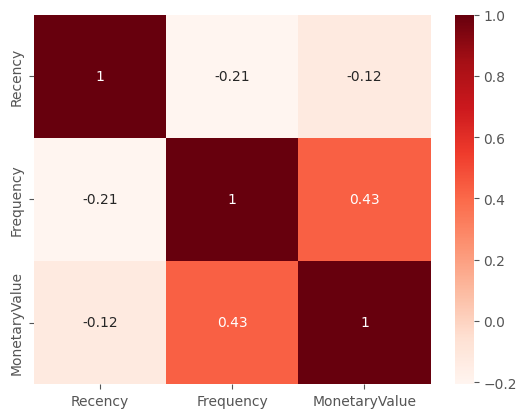

In [58]:
# Plot the heatmap of the feature correlations in the dataframe
sns.heatmap(rfm_data.corr(), annot = True, cmap = 'Reds')

- I picked this chart to show the correlation between different variables.

- The insight is that there is a negative correlation between recency and both frequency and monetary, indicating that customers who have recently made a purchase are less likely to make another purchase. There is also a positive but weak correlation between frequency and monetary.

- The insights can help create a positive business impact by helping businesses better understand customer behaviour and tailor their sales and promotions accordingly.

## **Plot the distribution of Recency, Frequency, and MonetaryValue**

A scatter matrix is a visual representation of the relationships between multiple variables or features in a dataset. It can help identify patterns, trends, and correlations between the variables. It is a useful tool for exploratory data analysis and can help provide insight into the data.

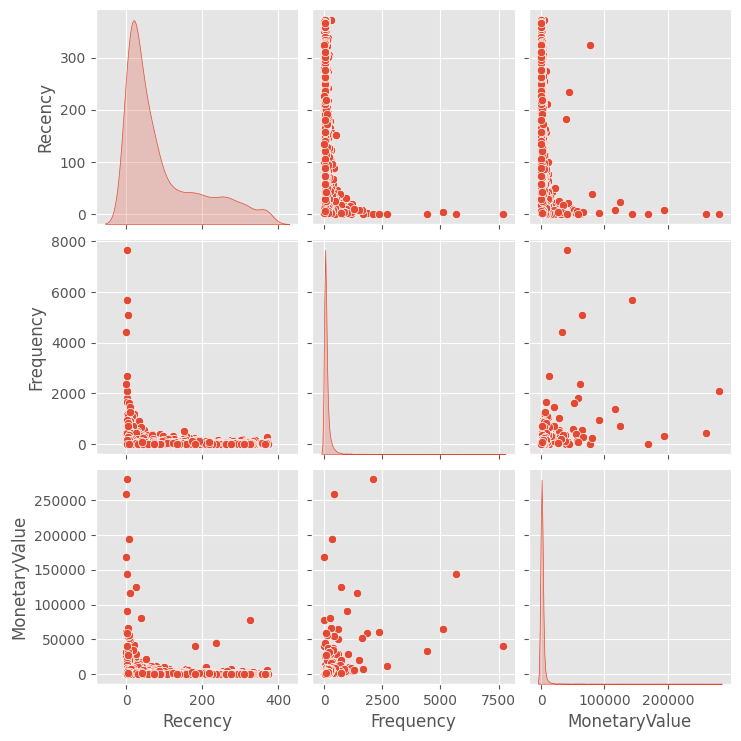

In [59]:
#Visualize the distribution of features in the dataset
sns.pairplot(rfm_data, diag_kind = 'kde');

- The pairplot with kde diagonal plots was chosen as it is an effective way to visualize the distribution and pairwise relationships between multiple features in a dataset. It allows us to quickly identify any correlations or patterns between variables, making it an excellent choice for visualizing the distribution of features in the dataset.

- We can observe that the distributions of the three variables are skewed. This suggests that normalization is necessary to make the data features normally distributed, as most clustering algorithms require them to be normally distributed.

In [60]:
#The skew() method is used to measure the asymmetry of the data around the mean.
rfm_data.skew()

Recency           1.246137
Frequency        18.043619
MonetaryValue    19.341403
dtype: float64

We can notice that we have a skewed distribution of the 3 variables and there exist outliers.

This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

## **Data Normalization**

For data normalization, logarithmic transformations were applied to the Recency and Monetary features, while a natural logarithmic transformation was applied to the Frequency feature. This was done to reduce the impact of outliers and to scale the data. A small constant value (0.1) was added to the original values before taking the logarithm to avoid taking the logarithm of zero or negative values.

In [61]:
# Calculate the logarithmic values of the Recency and Monetary features

# logarithmic value of the Recency feature
rfm_r_log = np.log(rfm_data['Recency'] + 0.1)

# logarithmic value of the Monetary feature
rfm_m_log = np.log(rfm_data['MonetaryValue'] + 0.1)


# calculate the natural log of the 'Frequency' column
rfm_f_log = np.log(rfm_data['Frequency'])

In [62]:
# Create a DataFrame containing logarithmic values of the Recency, Monetary and Frequency columns

log_data = pd.DataFrame({'Monetary' : rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})

log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.253944,5.784133,0.000000
12347.0,8.368716,0.741937,5.204007
12348.0,7.494063,4.318821,3.433987
12349.0,7.471733,2.895912,4.290459
12350.0,5.812637,5.736895,2.833213


**Plot the distribution of Recency, Frequency, and MonetaryValue after Data Normalization**

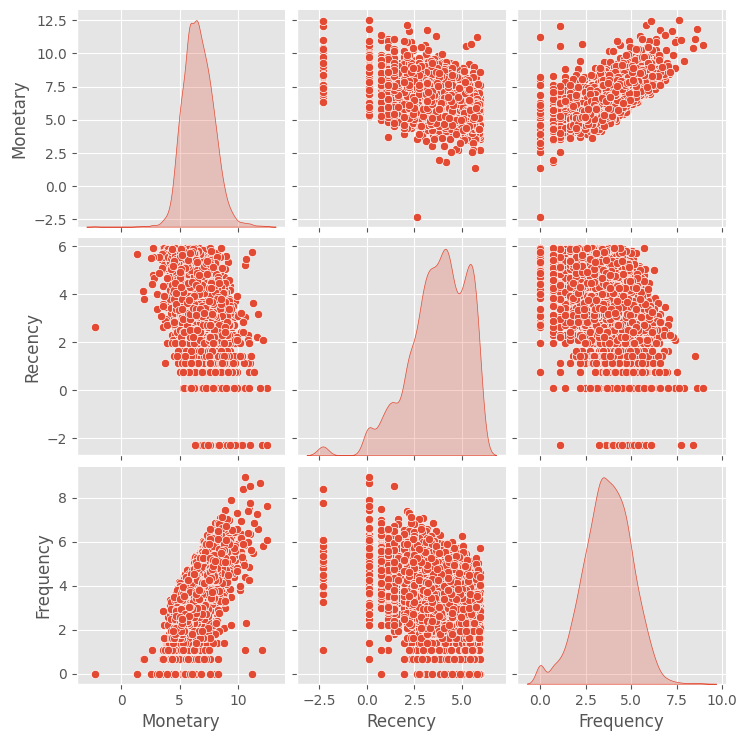

In [63]:
# Use seaborn's pairplot function to create a scatter matrix for each pair of features in the data

sns.pairplot(data = log_data, diag_kind = 'kde');

The distribution of the Frequency and Monetary features have improved and appear to be more normal, but the distribution of the Recency feature has only improved to some extent and is still not as well-normalized as the other two features.

In [64]:
# Calculate the skewness of each feature in the data
log_data.skew()

Monetary     0.304348
Recency     -0.869174
Frequency   -0.219900
dtype: float64

## **Correlation Heatmap**

<Axes: >

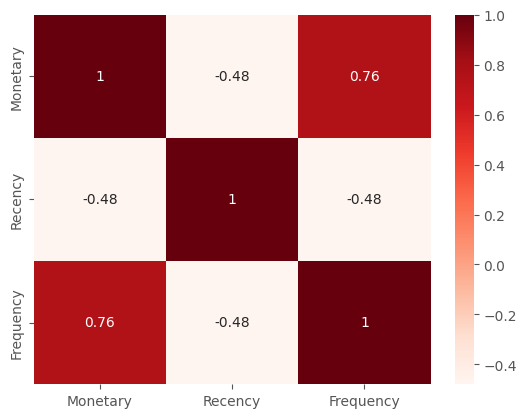

In [65]:
# Features correlation after log transformation or data normalization
sns.heatmap(log_data.corr(), annot = True, cmap = 'Reds')

The correlation between Monetary and Frequency is now stronger.

In [66]:
# use the corr method of the data frame to calculate the correlation matrix
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.479635,0.757055
Recency,-0.479635,1.000000,-0.478532
Frequency,0.757055,-0.478532,1.000000


In [67]:
# Assign the normalized data to a variable "X"
X = log_data

## **Data Scaling**

In [68]:
from sklearn.preprocessing import StandardScaler
# Define the features to use for K-means
features = ['Recency', 'Frequency', 'Monetary']

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(log_data[features].values)

I used Standardization to transform my features in order to ensure that they had a similar scale and distribution. This was important because some machine learning algorithms are sensitive to the scale and distribution of features, and Standardization helps to ensure unbiased results.

## ***7. ML Model Implementation***

## **7.1. K-means Implementation**

- One of the common challenges when working with k-means is the need to specify the number of clusters beforehand. Determining the appropriate number of clusters is not always straightforward, and it can be difficult to deduce from the data alone. To tackle this challenge, a common approach is to try different numbers of clusters and evaluate their corresponding silhouette coefficients.

- The **Silhouette Coefficient** measures the similarity of a data point to its assigned cluster, ranging from -1 (indicating dissimilarity) to 1 (indicating similarity). By computing the silhouette coefficient for each data point, we can gauge how well it aligns with its assigned cluster. A higher silhouette coefficient suggests that the point is more similar to its cluster, indicating better clustering performance.

- Another method that can be used to determine the optimal number of clusters is the **Elbow method**. This technique involves plotting the number of clusters against the corresponding distortion or inertia (the sum of squared distances between each point and its centroid). The plot often resembles an "elbow" shape, and the number of clusters at the "elbow" is considered a good choice for the optimal cluster count.

- It's worth noting that k-means is sensitive to its initializations since they play a crucial role in the quality of the obtained solutions. To address this, a smart initialization technique called** k-means++** is commonly utilized. K-means++ intelligently selects initial cluster centroids, increasing the chances of finding better cluster arrangements. By leveraging k-means++ initialization, we enhance the algorithm's ability to converge to high-quality solutions.

### **7.1.1 K-Means with silhouette_score**

In [69]:
silhouette_scores = []

# Loop over different values of K
for n_clusters in range(2, 16):
  # Initialize the K-Means model with number of clusters
  kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters)

  # Fit the KMeans Model to the data
  kmeans.fit(X)

  # Predict the cluster labels for each data point
  labels = kmeans.labels_

  # Calculate the Silhouette score
  silhouette = silhouette_score(X, labels)

  # Append the silhouette_score to the array
  silhouette_scores.append(silhouette)

  # Print the silhouette score
  print(f'Silhouette score for {n_clusters} clusters: {silhouette:.3f}')


Silhouette score for 2 clusters: 0.395
Silhouette score for 3 clusters: 0.307
Silhouette score for 4 clusters: 0.299
Silhouette score for 5 clusters: 0.277
Silhouette score for 6 clusters: 0.277
Silhouette score for 7 clusters: 0.268
Silhouette score for 8 clusters: 0.264
Silhouette score for 9 clusters: 0.249
Silhouette score for 10 clusters: 0.264
Silhouette score for 11 clusters: 0.261
Silhouette score for 12 clusters: 0.260
Silhouette score for 13 clusters: 0.261
Silhouette score for 14 clusters: 0.261
Silhouette score for 15 clusters: 0.253


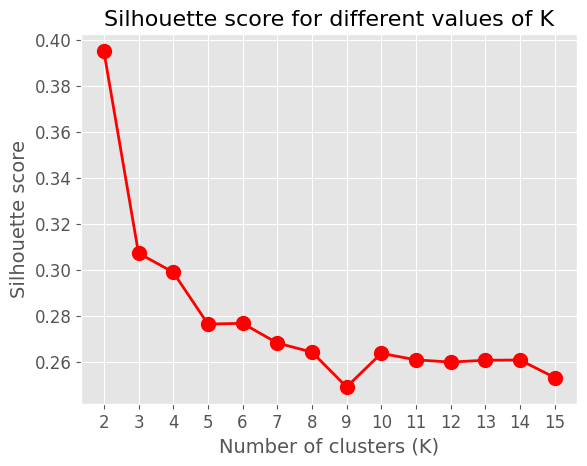

In [70]:
# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores, '-o', color='red', markersize=10, linewidth=2)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('Silhouette score for different values of K', fontsize=16)
plt.xticks(range(2, 16), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**The best silhouette score obtained is when the number of clusters is 2.**

In [71]:
# Instantiate a KMeans object with 2 clusters
kmeans = KMeans(n_clusters = 2)


# Fit the input data X to the Mean Model
kmeans.fit(X)

# Predict the cluster labels for the input data X using the trained KMeans model
y_kmeans = kmeans.predict(X)

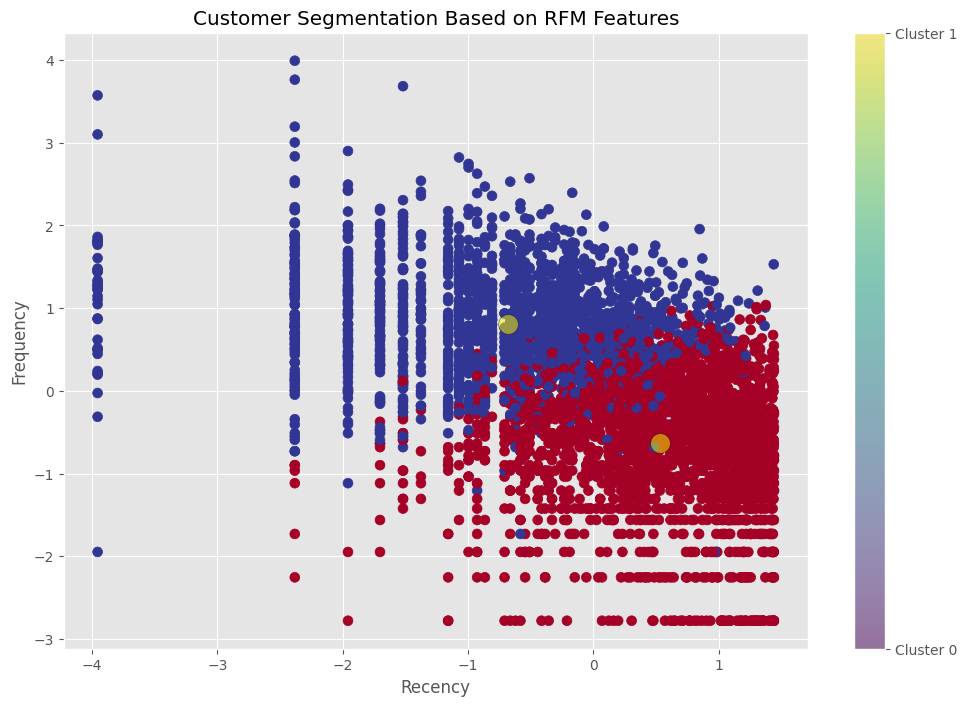

In [72]:
# Visualization of customer segmentation based On RFM features.
# Set the figure size and title for the scatter plot
plt.figure(figsize=(12,8))
plt.title('Customer Segmentation Based on RFM Features')

# Plot the scatter plot using the first two features of the input data X and the predicted cluster labels y_kmeans
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

# Get the cluster centers from the trained KMeans model and plot them as yellow circles with transparency
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5, edgecolor='black')

# Set the x-axis and y-axis labels
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Add a color bar to the plot to show the correspondence between the colors and the cluster labels
color_bar = plt.colorbar()
color_bar.set_ticks(np.unique(y_kmeans))
color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])

# Show the plot
plt.show()

### **7.1.2 K-Means with Elbow method**

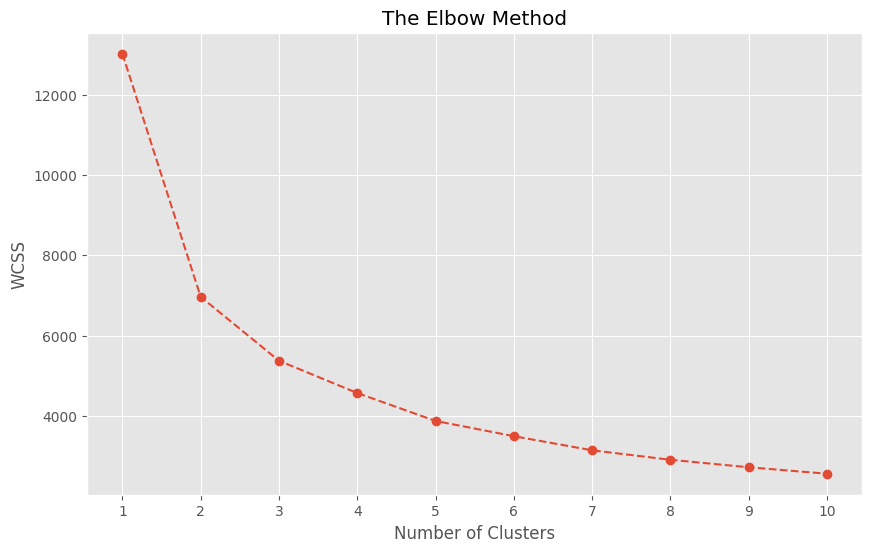

In [73]:
# Input data X

# Initialize an empty list to store the WCSS values for different number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  # Create a KMeans instance for each number of clusters
    kmeans.fit(X)  # Fit the KMeans model to the input data X
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list for the current number of clusters

# Plot the WCSS values against the number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


**The Elbow Method plot is commonly used to identify the optimal number of clusters in a K-means clustering algorithm.**

In [74]:
# Create an instance of the KMeans model with 2 clusters and initialize the centroids using the 'k-means++' method
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)

# Fit the KMeans model to the data in the X variable
KMean_clust.fit(X)

# Add a new column to the rfm_df dataframe to store the cluster labels for each observation
rfm_df['Cluster'] = KMean_clust.labels_

# Display the first 10 rows of the rfm_df dataframe with the new 'Cluster' column
rfm_df.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Cluster
0,12346.0,325,1,77183.60,1,1,4,114,0
1,12347.0,2,182,4310.00,4,4,4,444,1
2,12348.0,75,31,1797.24,2,2,4,224,0
3,12349.0,18,73,1757.55,3,3,4,334,1
4,12350.0,310,17,334.40,1,1,2,112,0
5,12352.0,36,85,2506.04,3,3,4,334,1
6,12353.0,204,4,89.00,1,1,1,111,0
7,12354.0,232,58,1079.40,1,3,3,133,0
8,12355.0,214,13,459.40,1,1,2,112,0
9,12356.0,22,59,2811.43,3,3,4,334,1


## **7.2 Agglomerative Hierarchial Clustering**

Agglomerative Hierarchical Clustering is a bottom-up approach that merges similar clusters until the desired number of clusters is achieved. It uses a distance/similarity measure between data points and can create a dendrogram to visualize the merging process. It captures hierarchical relationships but can be computationally expensive for large datasets and is not suitable for high-dimensional data.

In [75]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering with 2 clusters, euclidean affinity, and ward linkage
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Fit the input data X to the model
model.fit(X)


AgglomerativeClustering(affinity='euclidean')

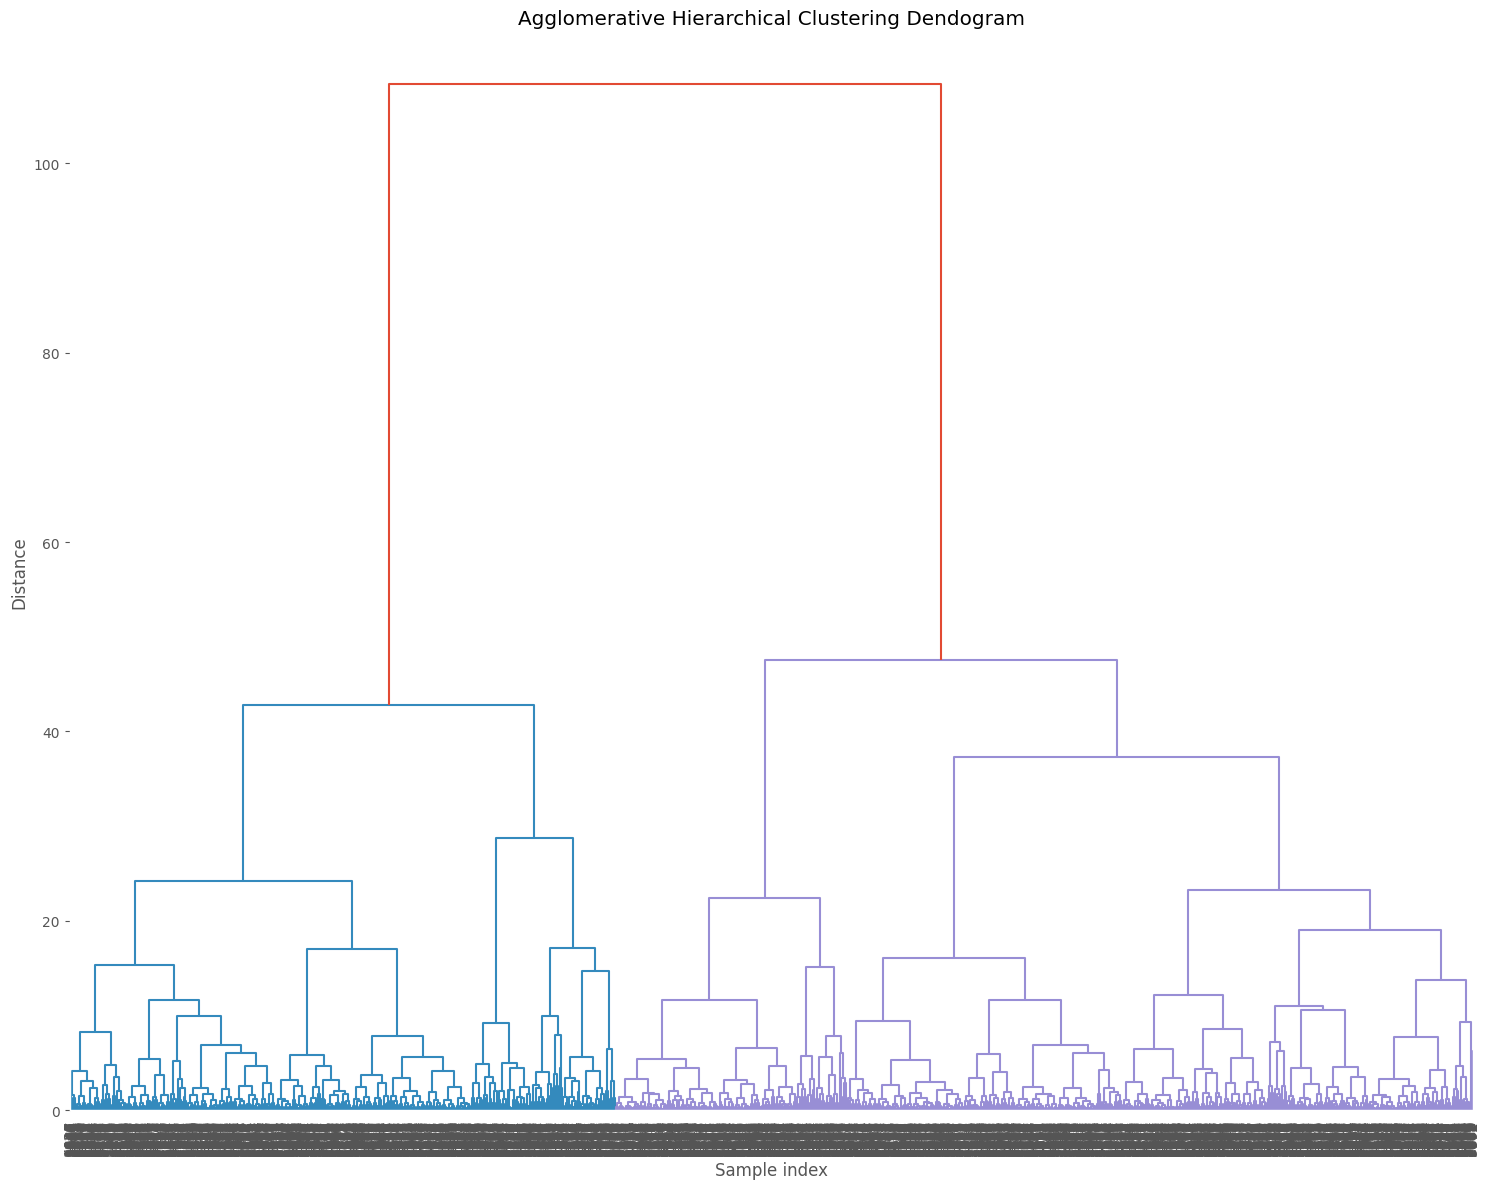

In [76]:

# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Set the figure size and title for the dendrogram plot
plt.figure(figsize=(15, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')

# Set the x and y-axis labels for the dendrogram plot
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Create a linkage matrix using the input data X and the ward linkage method
Z = linkage(X, 'ward')

# Plot the dendrogram with specified parameters
dendrogram(Z, leaf_rotation=90.0, p=25, color_threshold=80, leaf_font_size=10, truncate_mode='level')

# Ensure tight layout of the plot
plt.tight_layout()

## **7.3 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN is a density-based clustering algorithm that groups data points based on their density in the feature space. It identifies clusters as dense regions separated by areas of lower density and is robust to noise and outliers. It doesn't require specifying the number of clusters in advance. Its parameters include the radius (Eps) and minimum number of points (MinPts) to form a core point.

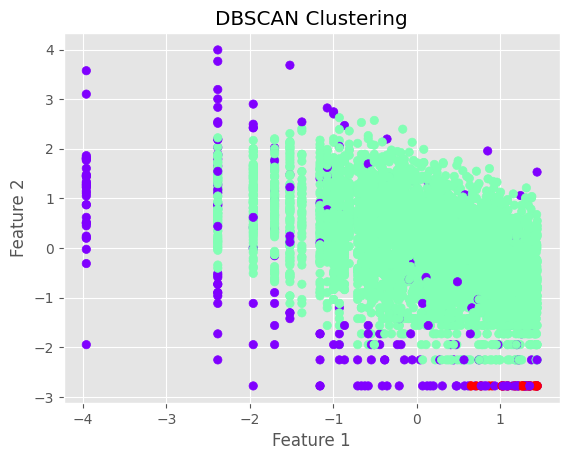

In [77]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=15)
dbscan.fit(X)

# Plot the results
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

- The chart used is a scatter plot, which is a suitable choice for visualizing the clustering results of DBSCAN. The x and y axes represent the two features of the dataset, and the points are colored based on their assigned cluster labels.

- The insights gained from the chart include identifying the clusters formed by the DBSCAN algorithm and their density. The points that are closer to each other are assigned to the same cluster, and the outliers or noise points are labeled as -1. By observing the distribution of the points and the density of the clusters, we can understand the structure and characteristics of the data, and potentially find any patterns or anomalies.

- The gained insights can help in creating a positive business impact by identifying groups of similar data points, which can aid in targeting specific segments of customers or optimizing operational processes.

# **Summary Table**

In [78]:
# Import necessary libraries
from prettytable import PrettyTable

# Initialize the table with specified column names
myTable = PrettyTable(['SL No.', "Model_Name", 'Data', "Optimal_Number_of_cluster"])

# Add rows to the table
myTable.add_row(['1', "K-Means with silhouette_score", "RFM", "2"])
myTable.add_row(['2', "K-Means with Elbow method", "RFM", "2"])
myTable.add_row(['3', "Hierarchical clustering", "RFM", "2"])
myTable.add_row(['4',"DBSCAN ", "RFM", "3"])

# Print the table
print(myTable)

+--------+-------------------------------+------+---------------------------+
| SL No. |           Model_Name          | Data | Optimal_Number_of_cluster |
+--------+-------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score | RFM  |             2             |
|   2    |   K-Means with Elbow method   | RFM  |             2             |
|   3    |    Hierarchical clustering    | RFM  |             2             |
|   4    |            DBSCAN             | RFM  |             3             |
+--------+-------------------------------+------+---------------------------+


# **Conclusion**

**EDA**

- Null values and duplicates were removed from the dataset before applying clustering.

- Top customer IDs were found to be 17841.0, 14911.0, 14096.0, 12748.0, and 14606.0.

- The top five countries based on the percentage of total orders were the United Kingdom (88.95%), Germany (2.33%), France (1.84%), Ireland (1.84%), and Spain (0.62%).

- The top five products purchased based on frequency were White Hanging Heart T-Light Holder, Regency Cakestand 3 Tier, Jumbo Bag Red Retrospot, Party Bunting, and Assorted Colour Bird Ornament.

- The top stock codes based on count values were 85123A, 22423, 85099B, 47566, and 84879.

- New columns were created using InvoiceDate, such as Year, Month, Day, Hour, Month_Num, and Day_Num.

- The total amount of each order was calculated using the product of unit price and quantity.

- The months of November, October, December, September, and May generated the most business.

- The most popular purchasing days were Thursday, Wednesday, Tuesday, Monday, Saturday, and Friday.

- Most customers made purchases between 10:00 A.M. and 2:00 P.M.

- The top time duration for purchasing was found to be afternoon, followed by morning and evening.

**Algorithm**
- RFM (Recency, Frequency, and Monetary) dataframe helps in solving problems in a particular order, making it easy to recommend and display new products to selected customers.

- Different clustering algorithms were applied to the dataset, including: Clustering on Recency, Frequency & Monetary (RFM) with 2 clusters.

1. K-Means with Silhouette_score
2. K-Means with Elbow Method
3. Hierarchical Clustering
4. DBSCAN

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***